In [88]:
import pickle as pk
import pandas as pd
from tqdm import tqdm

In [89]:
mag2journal = pk.load(open('../../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/mag2journal.pk', 'rb'))

In [90]:
journal_cate = pk.load(open('../../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/journal_cate.pkl','rb'))

In [91]:
cas = pd.read_excel('../../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/jcr/中科院大类小类划分2022.xlsx')

In [92]:
cas

,大类,刊名,ISSN,EISSN,Review
0,材料科学,2D Materials,2053-1583,2053-1583,NaN
1,材料科学,AATCC Journal of Research,2330-5517,2330-5517,NaN
2,材料科学,AATCC REVIEW,1532-8813,1532-8813,NaN
3,材料科学,ACS Applied Electronic Materials,NaN,2637-6113,NaN
4,材料科学,ACS Applied Energy Materials,2574-0962,NaN,NaN
...,...,...,...,...,...
12505,综合性期刊,SOUTH AFRICAN JOURNAL OF SCIENCE,0038-2353,1996-7489,NaN
12506,综合性期刊,Sustainability,NaN,2071-1050,NaN
12507,综合性期刊,Symmetry-Basel,NaN,2073-8994,NaN
12508,综合性期刊,The Innovation,2666-6758,2666-6758,NaN


In [93]:
journalName2category = {}
print(1)
for index, row in tqdm(cas.iterrows()):
    # print(row['大类'],row['刊名'],row['ISSN'],row['EISSN'],row['Review'],)
    # print(type(row['大类']),type(row['刊名']),type(row['ISSN']),type(row['EISSN']),type(row['Review']),)
    # print([row['大类']],[row['刊名']],[row['ISSN']],[row['EISSN']],[row['Review']],)
    if row['刊名'] in journalName2category:
        break
    else:
        journalName2category[row['刊名']] = [row['大类'],[row['ISSN']]+[row['EISSN']]]

1


12510it [00:00, 22887.09it/s]


In [94]:
journal_cate

{'176781058': {'jcrCate': 'MATHEMATICS, INTERDISCIPLINARY APPLICATIONS - SCIE$STATISTICS & PROBABILITY - SCIE$DEMOGRAPHY - SSCI$SOCIAL SCIENCES, MATHEMATICAL METHODS - SSCI',
  'jcrName': 'Mathematical Population Studies',
  'magName': 'mathematical population studies',
  'magIssn': ['0889-8480', '0889-8480', '1547-724X'],
  'jcrIssn': '0889-8480',
  'jcrEIssn': '1547-724X',
  '2021-JIF': '1.355',
  '2021-Qscie': 'Q3',
  '2021-Qssci': 'Q4',
  '2021-Qahci': 'N/A',
  '2021-JCI': '0.38'},
 '18095265': {'jcrCate': 'MINERALOGY - SCIE',
  'jcrName': 'Journal of Mineralogical and Petrological Sciences',
  'magName': 'journal of mineralogical and petrological sciences',
  'magIssn': ['1345-6296', '1349-3825', '1345-6296'],
  'jcrIssn': '1345-6296',
  'jcrEIssn': '1349-3825',
  '2021-JIF': '1.041',
  '2021-Qscie': 'Q4',
  '2021-Qssci': 'N/A',
  '2021-Qahci': 'N/A',
  '2021-JCI': '0.30'},
 '28603624': {'jcrCate': 'ONCOLOGY - SCIE$RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING - SCIE',
  'jcrName'

In [95]:
for k,v in journalName2category.items():
    if v[0] == '人文科学':
        print(k,v)
        break

Accountability in Research-Policies and Quality Assurance ['人文科学', ['0898-9621', '1545-5815']]


In [96]:
magid2bigcategory = {}

In [97]:
# jcr和mag共匹配到13762本期刊；中科院这个只有12510个，少了一些；可以简单看下少的这些是为啥(主要是AHCI)
for k,v in journal_cate.items():
    flag = 0
    for issn in v['magIssn']+[v['jcrIssn']]+[v['jcrEIssn']]:
        for kanming, atrributes in journalName2category.items():
            if issn in atrributes[1]:
                magid2bigcategory[k] = atrributes[0]
                flag = 1
                break
        if flag == 1:
            break
    if flag == 0:
        if '- AHCI' in v['jcrCate']:
            magid2bigcategory[k] = '人文科学'
            flag = 1
    if flag == 0:
        print(v)

{'jcrCate': 'ONCOLOGY - SCIE', 'jcrName': 'Journal of Oncology Practice', 'magName': 'journal of oncology practice', 'magIssn': ['1554-7477', '1935-469X', '1554-7477'], 'jcrIssn': '1554-7477', 'jcrEIssn': '1935-469X', '2021-JIF': '3.714', '2021-Qscie': 'Q3', '2021-Qssci': 'N/A', '2021-Qahci': 'N/A', '2021-JCI': '0.57'}
{'jcrCate': 'CHEMISTRY, MULTIDISCIPLINARY - SCIE', 'jcrName': 'JOURNAL OF THEORETICAL & COMPUTATIONAL CHEMISTRY', 'magName': 'journal of theoretical and computational chemistry', 'magIssn': ['0219-6336', '1793-6888', '0219-6336'], 'jcrIssn': '0219-6336', 'jcrEIssn': '1793-6888', '2021-JIF': '2.440', '2021-Qscie': 'Q3', '2021-Qssci': 'N/A', '2021-Qahci': 'N/A', '2021-JCI': '0.28'}
{'jcrCate': 'ENGINEERING, CIVIL - SCIE$WATER RESOURCES - SCIE', 'jcrName': 'JOURNAL OF WATER SUPPLY RESEARCH AND TECHNOLOGY-AQUA', 'magName': 'aqua', 'magIssn': ['0003-7214', '1365-2087', '0003-7214'], 'jcrIssn': '0003-7214', 'jcrEIssn': '1365-2087', '2021-JIF': '3.007', '2021-Qscie': 'Q2', '202

In [98]:
from collections import Counter
dataCounter = Counter()
for k,v in magid2bigcategory.items():
    dataCounter[v] += 1

In [99]:
# for k,v in magid2bigcategory.items():
#     if v=='人文科学':
#         print(journal_cate[k])
dataCounter

Counter({'法学': 841,
         '地球科学': 452,
         '医学': 3662,
         '生物学': 903,
         '数学': 534,
         '农林科学': 693,
         '物理与天体物理': 313,
         '心理学': 497,
         '工程技术': 1157,
         '计算机科学': 518,
         '环境科学与生态学': 392,
         '材料科学': 411,
         '化学': 396,
         '综合性期刊': 62,
         '人文科学': 1744,
         '管理学': 418,
         '经济学': 417,
         '教育学': 254})

In [100]:
len(magid2bigcategory)

13664

In [101]:
magid2bigcategory

{'176781058': '法学',
 '18095265': '地球科学',
 '28603624': '医学',
 '20253135': '医学',
 '37879208': '医学',
 '99462834': '生物学',
 '128124174': '医学',
 '103897674': '生物学',
 '98347115': '数学',
 '2480243177': '农林科学',
 '166445956': '物理与天体物理',
 '90160718': '心理学',
 '31010182': '工程技术',
 '34872747': '工程技术',
 '2764646616': '医学',
 '170502224': '计算机科学',
 '108239708': '环境科学与生态学',
 '13083541': '医学',
 '48180145': '医学',
 '173281865': '医学',
 '137552098': '医学',
 '38341973': '材料科学',
 '14299449': '医学',
 '81330323': '医学',
 '13265631': '心理学',
 '4210217549': '农林科学',
 '54128167': '医学',
 '207559368': '地球科学',
 '89339265': '医学',
 '193671726': '农林科学',
 '117436046': '计算机科学',
 '56953219': '医学',
 '89023782': '农林科学',
 '12965339': '数学',
 '1244823': '工程技术',
 '34074479': '医学',
 '171170845': '数学',
 '198272637': '医学',
 '4210227604': '医学',
 '105693234': '数学',
 '45406943': '工程技术',
 '62565178': '医学',
 '75756335': '医学',
 '78190159': '医学',
 '169946948': '数学',
 '207216207': '工程技术',
 '143352558': '医学',
 '133939727': '医学',
 '2764768178': '医学

In [102]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as mtick
import pickle as pk
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 12 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

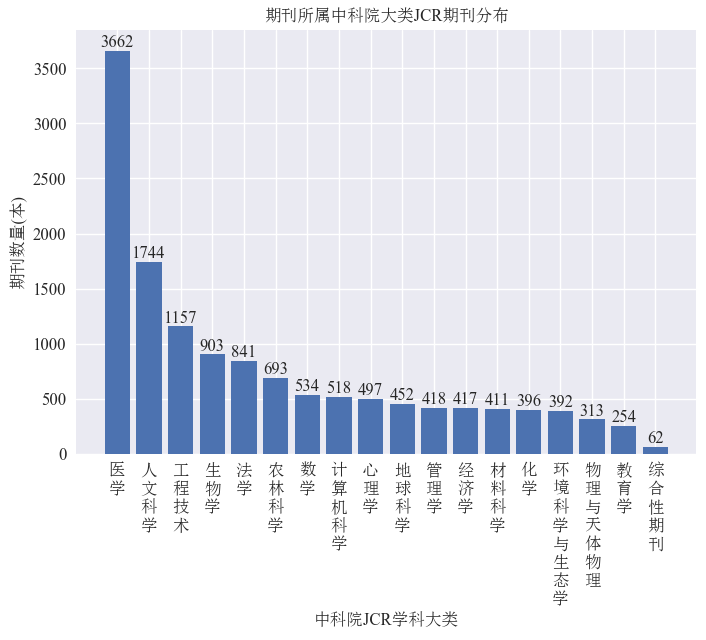

In [106]:
# 期刊数量分布
numFields , frequency = zip(*sorted(dataCounter.items(),key=lambda x:-x[1]))
# print(numFields, frequency)
ept_list = []
for i in numFields:
    ept_list.append('\n'.join(list(i)))
fig, ax = plt.subplots()
bars = ax.bar(numFields, frequency)
ax.bar_label(bars)
ax.set_ylabel('期刊数量(本)', font=prop.get_name())
ax.set_xlabel('中科院JCR学科大类', font=prop.get_name())
ax.set_title('期刊所属中科院大类JCR期刊分布', font=prop.get_name())
ax.set_xticks(numFields,ept_list)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()
fig.savefig("期刊所跨JCR学科数量分布.png",dpi=300,bbox_inches='tight')

In [104]:
pk.dump(magid2bigcategory, open('../../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/magid2bigcategory.pk', 'wb'))
len(magid2bigcategory)

13664